# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Открытие файла с данными и изучение общей информации

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

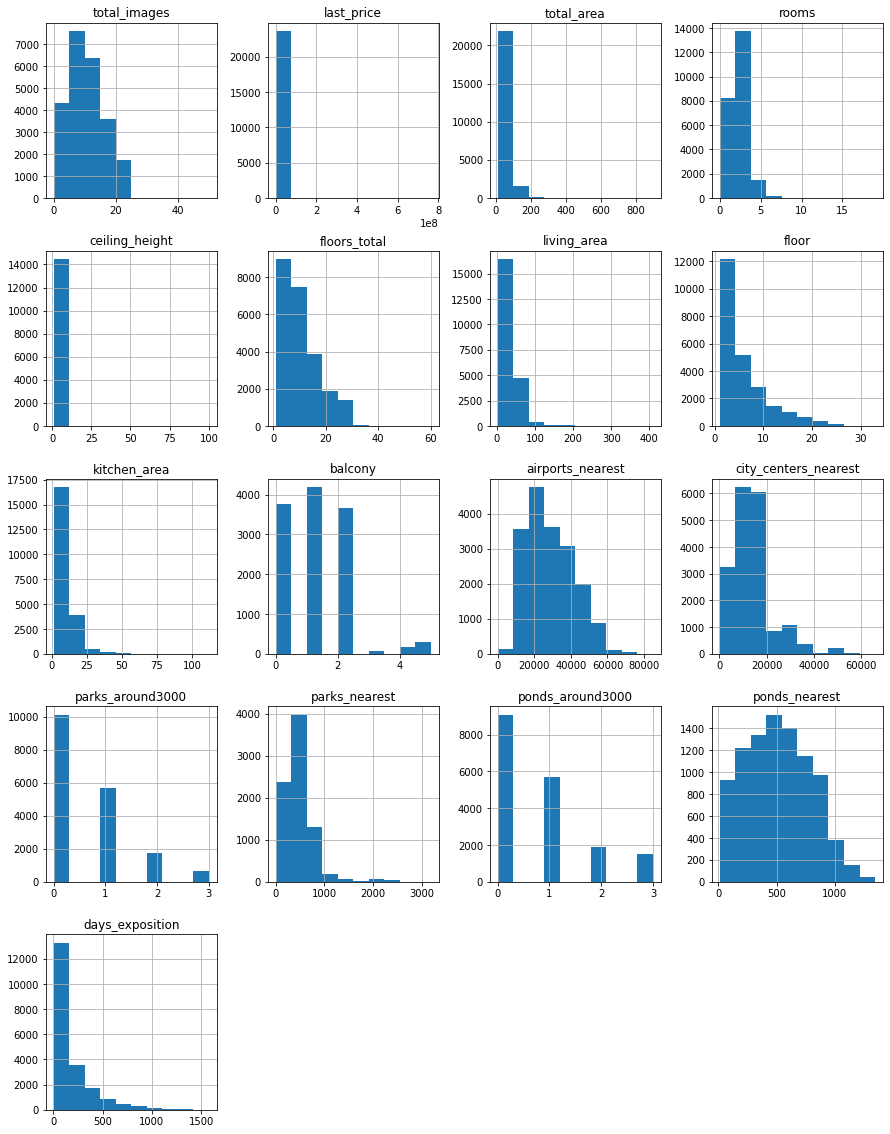

In [2]:
# импорт необходимых для проекта библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sb
#считывание файла датасета
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
# переименование  столбца не соответсвующего стилю
data.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest'}, inplace = True) 

# вывод 10 первых строк датасета
display(data.head(10))
# вывод общей информации по датасету
print(data.info())
# построение гистограмм
data.hist(figsize=(15, 20))
plt.show()



### Предобработка данных
#### Подсчет пропусков 

In [3]:
# смотрим количество пропущенных значений
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


#### Вывод по пропускам
   Большая часть пропусков была обнаружена в столбцах ***parks_nearest***(расстояние до ближайшего парка)  и ***ponds_nearest***(расстояние до ближайшего водоёма) данные пропуски были сделаны вероятнее всего из за того что вокруг данных жилых обьектов данных мест нет и покупатели незнали что указать, как и в столбцах в которых указанно количество парков и водоемов в радиусе 3 км (столбец ***parks_around3000***, ***ponds_around3000***  так же логично было бы предположить что пропусками в столбцах  ***airports_nearest***(расстояние до ближайшего аэропорта) и ***city_centers_nearest***(расстояние до центра города) имеют туже природу и было бы неплохо заполнить их медианным значением по населенным пунктам, но к большому сожалению во многих населенных пунктах нет информации о растоянии до центра и аэропорта, пропуски в столбцах ***living_area*** и ***kitchen_area***  связаны с особенностями планировки и типом недвижости (возможно у продавцов нет такого разделения в жилом помещении) думаю пропуски в этих столбцах будет не коректно заполнить 0 или медианным значением так как это исказит реальные данные, что не скажешь о пропусках в столбце ***balcony***(наличие балконов) которые очевидно были сделаны в связи с отсутсвием балконов в жилом помещении и очевидно заполняются нулями, пропуски в столбце 
***floors_total***(количество этажей в доме) столбец оставитм без изменений, было бы некоректно заполнить его медианой или единицей

   

#### Заполнение пропусков и приведение данных к более читабельному виду 

In [6]:
# заменяем пропущенные значения на нет в столбце 'пренадлежность к апартаментам'
data['is_apartment'] = data['is_apartment'].fillna(value = False)
# В столбце 'Количество балконов' заменяем пропущенные значения на 0. Приводим в целочисленный тип количество балконов.
data['balcony'] = data['balcony'].fillna(0).astype('int')
# заменяем пропущенные значения на 0 в столбце 'количество парков на 3км' Приводим в целочисленный тип количество парков.
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
# заменяем пропущенные значения на 0 в столбце 'количество прудов на 3км' Приводим в целочисленный тип количество прудов.
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')
#изменим цену на тип int для удобства просмотра
data['last_price'] = data['last_price'].astype('int')
# уберем не нужное значение времени в столбце 'first_day_exposition'
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
#заполним пропуски в столбце 'название насселенного пункта'  значением 'неизвестно'
data['locality_name'] = data['locality_name'].fillna('неизвестно')
# уберем пропуски в общем количестве этажей в домах  и приведём в целочисленный тип.
data['floors_total'] = data['floors_total'].dropna(0).astype('int')

# cмотрим оставшиеся количество пропущенных значений
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [7]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### Обработка  дубликатов 

In [8]:
#посмотрим явные дубликаты в датасете
print(data.duplicated().sum())

#выведем уникальные значения и их количество 'local_name'
print(data['locality_name'].nunique())
print(data['locality_name'].unique())

# удалим дубликаты поселков в 'locality_name'
(data['locality_name'].replace
 ({'посёлок':'поселок','поселок городского типа':'поселок','посёлок городского типа':'поселок','городской поселок':'поселок'},
  regex=True, inplace=True)
)

0
365
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Нов

In [9]:
#смотрим результат
print(data['locality_name'].nunique())
print(data['locality_name'].unique())


339
['Санкт-Петербург' 'поселок Шушары' 'городской поселок Янино-1'
 'поселок Парголово' 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино' 'поселок Красный Бор'
 'Гатчина' 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'поселок Металлострой'
 'поселок городского типа Лебяжье' 'поселок городского типа Сиверский'
 'поселок Молодцово' 'поселок Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'поселок Романовка' 'поселок Бугр

In [10]:
# просмотр уникальных уникальных значений после удаления 
data['locality_name'].nunique()

339

In [11]:
# смотрим как распределяются данные 
print(data.describe())
 

       total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  23699.000000   
mean      10.673824     34.457852      5.892358     10.569807      0.591080   
std        6.597173     22.030445

#### Обработка  аномалий

In [12]:
# Количество строк не обработанного датасета для подсчёта, процентов удаленных данных
print(data.shape[0])

23699


##### Обработка  аномально высоких потолков

In [13]:
print(data['ceiling_height'].describe())
# анализ стобца данных о высоте потолков
range_сeiling=data.ceiling_height.value_counts(bins =100).to_frame()
# переименовываем столбцы для большее понятного отображения
range_сeiling = range_сeiling.rename( columns={'ceiling_height':'Количество_квартир'})
range_сeiling = range_сeiling.rename_axis('Диапозон_высот')
display(range_сeiling.head(10))
# количество квартир высотой потолков ниже 2 метров
print(data.loc[data['ceiling_height'] < 2, 'ceiling_height'].count())
# количество квартир с высотой потолков от 4 метров до 20 метров
print(data.loc[data['ceiling_height'] > 4, 'ceiling_height'].count() - 
data.loc[data['ceiling_height'] > 20, 'ceiling_height'].count())
# количество квартир с высотой потолков от 50 метров
print(data.loc[data['ceiling_height'] > 40, 'ceiling_height'].count())


count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


,Количество_квартир
Диапозон_высот,
"(1.99, 2.98]",11859
"(2.98, 3.97]",2527
"(3.97, 4.96]",78
"(26.74, 27.73]",9
"(4.96, 5.95]",7
"(24.76, 25.75]",7
"(7.93, 8.92]",4
"(0.9, 1.99]",3
"(31.69, 32.68]",2


3
53
1


count    14448.000000
mean         2.720970
std          0.257935
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64


array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

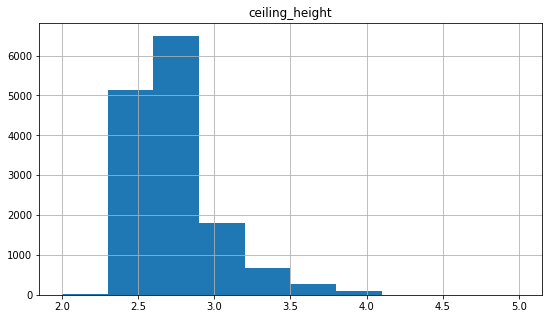

In [14]:
# индексация по выводу
data = data.loc[(data['ceiling_height'] <= 40) | (data['ceiling_height'].isnull())]
data = data.loc[(data['ceiling_height'] >= 2) | (data['ceiling_height'].isnull())]
data.loc[data['ceiling_height'] >= 20] = data['ceiling_height']/10
data = data.loc[(data['ceiling_height'] <= 4)|(data['ceiling_height'].isnull())]
print(data['ceiling_height'].describe())
data.hist('ceiling_height', bins = 10, range = (2.0 , 5.0), figsize = (9, 5))

*Как видно из таблицы практически все квартиры в датасете имеют высоту потолков от 1 до 4 метров, есть предположение квартиры с потолками от 20 до 40 метров на самом деле имеют высоту от 2 до 4 метров их было решено превести к нормальному виду, поскольку высота потолка менее 2 метров очевидно, не имеет ничего общего с реальностью их было решено удалить, как и другие остальные значение сильно отличающиеся от основного количества квартир ( т.е удаляются квартиры где потолки менее 2 метров, потолки с диапозоном 4-20 метров и 50-100 метров (всего 55 значений(3+53-1(0,0037% данных) их решено удалить* 

##### Обработка квартир с большим количеством комнат

In [15]:
# анализ стобца данных о количестве комнат
count_rooms = data.rooms.value_counts().to_frame()
# переименовываем столбцы для большее понятного отображения
count_rooms = count_rooms.rename( columns={'rooms':'Количество_квартир'})
count_rooms = count_rooms.rename_axis('Количество_комнат')
print(data['rooms'].describe())
display(count_rooms.head(15))
# количество аномальных квартир 
print(data.loc[data['rooms'] > 7, 'rooms'].count())
# удаление 'аномальных квартир'
print(data.info())
data = data.loc[data['rooms'] <= 7]
data['rooms']=data['rooms'].astype('int')
print(data['rooms'].describe())
print(data.shape[0])

count    23643.000000
mean         2.069018
std          1.075484
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


,Количество_квартир
Количество_комнат,
1.0,8030
2.0,7918
3.0,5793
4.0,1176
5.0,319
0.0,195
6.0,102
7.0,57
2.4,22


31
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23643 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23643 non-null  float64
 1   last_price            23643 non-null  float64
 2   total_area            23643 non-null  float64
 3   first_day_exposition  23643 non-null  object 
 4   rooms                 23643 non-null  float64
 5   ceiling_height        14448 non-null  float64
 6   floors_total          23557 non-null  float64
 7   living_area           21746 non-null  float64
 8   floor                 23643 non-null  float64
 9   is_apartment          23643 non-null  object 
 10  studio                23643 non-null  object 
 11  open_plan             23643 non-null  object 
 12  kitchen_area          21378 non-null  float64
 13  balcony               23643 non-null  float64
 14  locality_name         23643 non-null  object 
 15  airports_nearest

*В датасете только 31(0.0013%) квартиры имеют более 7 комнат их решено удалить*

##### Обработка  аномально больших по плошади квартир

count    23612.000000
mean        59.806551
std         33.579037
min          2.500000
25%         40.000000
50%         52.000000
75%         69.400000
max        631.200000
Name: total_area, dtype: float64


,Количество_квартир
Диапозон_площадей,
"(23.457, 44.413]",8339
"(44.413, 65.37]",8306
"(65.37, 86.327]",3874
"(86.327, 107.283]",1483
"(107.283, 128.24]",643
"(128.24, 149.197]",287
"(149.197, 170.153]",215
"(1.87, 23.457]",139
"(170.153, 191.11]",113


18
22
count    23572.000000
mean        59.535945
std         31.379832
min         12.000000
25%         40.000000
50%         52.000000
75%         69.300000
max        400.000000
Name: total_area, dtype: float64
23572


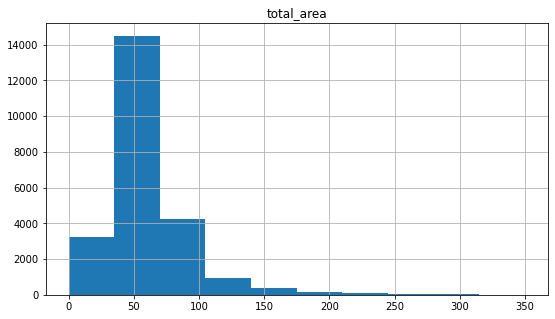

In [16]:
# анализ стобца аномалий
range_total_area = data.total_area.value_counts(bins=30).to_frame()
range_total_area = range_total_area.rename( columns={'total_area':'Количество_квартир'})
range_total_area = range_total_area.rename_axis('Диапозон_площадей')
print(data['total_area'].describe())
display(range_total_area)
# количество аномальных квартир 
print(data.loc[data['total_area'] > 400, 'total_area'].count())
print(data.loc[data['total_area'] < 12, 'total_area'].count())
# удаление 'аномальных квартир'
data = data.loc[(data['total_area'] <= 400) | (data['total_area'].isnull())]
data = data.loc[(data['total_area'] >= 12) | (data['total_area'].isnull())]
print(data['total_area'].describe())
data.hist('total_area', bins = 10, range = (0 , 350), figsize = (9, 5))
print(data.shape[0])

*В датасете только 88(0.003%) квартиры имеют площадь менее 10м2 и более 400м2 их решено удалить* 

##### Обработка аномальных квартир с большим днем размещения 

count    20417.000000
mean       180.403781
std        219.178883
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


,Количество_квартир
Диапазон_дней,
"(-0.58, 158.9]",13219
"(158.9, 316.8]",3546
"(316.8, 474.7]",1730
"(474.7, 632.6]",865
"(632.6, 790.5]",453
"(790.5, 948.4]",270
"(948.4, 1106.3]",178
"(1106.3, 1264.2]",92
"(1264.2, 1422.1]",48


51
count    20366.000000
mean       177.361043
std        210.805557
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1299.000000
Name: days_exposition, dtype: float64
0          NaN
1         81.0
2        558.0
3        424.0
4        121.0
         ...  
23694      NaN
23695     45.0
23696      NaN
23697    602.0
23698      NaN
Name: days_exposition, Length: 23521, dtype: float64
23521
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23521 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23521 non-null  float64
 1   last_price            23521 non-null  float64
 2   total_area            23521 non-null  float64
 3   first_day_exposition  23521 non-null  object 
 4   rooms                 23521 non-null  int64  
 5   ceiling_height        14356 non-null  float64
 6   floors_total          23435 non-null 

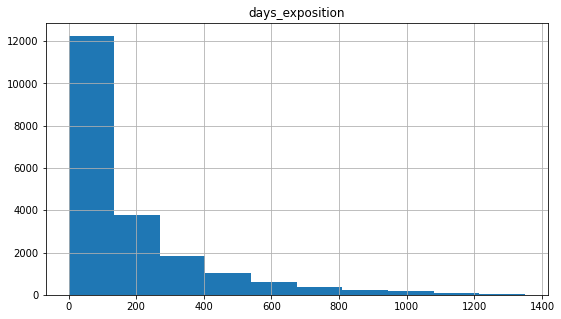

In [17]:
# анализ аномалий стобца 
range_days_exposition = data.days_exposition.value_counts(bins=10).to_frame()
range_days_exposition = range_days_exposition.rename( columns={'days_exposition':'Количество_квартир'})
range_days_exposition = range_days_exposition.rename_axis('Диапазон_дней')
print(data['days_exposition'].describe())
display(range_days_exposition)
# количество аномальных квартир 
print(data.loc[data['days_exposition'] > 1300, 'days_exposition'].count())
# удаление 'аномальных квартир'
data = data.loc[(data['days_exposition'] <= 1300)|(data['days_exposition'].isnull())]
print(data['days_exposition'].describe())
data.hist('days_exposition', bins = 10, range = (0 , 1350), figsize = (9, 5))
print(data['days_exposition'])
print(data.shape[0])
print(data.info())

*В датасете только 52(0.0022
ё%) квартиры с днем размещения больше 1300, их решено удалить*

##### Обработка самых дорогих квартир

In [18]:
# анализ аномалий стобца 
range_last_price = data.last_price.value_counts(bins=20).to_frame()
range_last_price = range_last_price.rename( columns={'last_price':'Количество_квартир'})
range_last_price = range_last_price.rename_axis('Диапазон_цен')
print(data['last_price'].describe())
display(range_last_price)
# количество аномальных квартир 
print(data.loc[data['last_price'] > 65000000, 'last_price'].count())
# удаление 'аномальных квартир'
data = data.loc[data['last_price'] <= 65000000]
print(data['last_price'].describe())
print(data.shape[0])

count    2.352100e+04
mean     6.339438e+06
std      9.279913e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      7.630000e+08
Name: last_price, dtype: float64


,Количество_квартир
Диапазон_цен,
"(-750797.8110000001, 38161580.5]",23345
"(38161580.5, 76310971.0]",129
"(76310971.0, 114460361.5]",25
"(114460361.5, 152609752.0]",14
"(152609752.0, 190759142.5]",3
"(267057923.5, 305207314.0]",1
"(305207314.0, 343356704.5]",1
"(724850609.5, 763000000.0]",1
"(228908533.0, 267057923.5]",1


64
count    2.345700e+04
mean     6.039865e+06
std      5.324771e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      6.500000e+07
Name: last_price, dtype: float64
23457


*В датасете только 81(0.003%) квартиры имеют цену более 20 миллионов рублей их решено удалить*

##### Обработка  аномально больших по жилой плошади квартир

count    21579.000000
mean        33.744669
std         19.228924
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        250.000000
Name: living_area, dtype: float64


,Количество_квартир
Диапозон_площадей,
"(26.8, 35.067]",5610
"(10.267, 18.533]",5309
"(35.067, 43.333]",3062
"(18.533, 26.8]",2747
"(43.333, 51.6]",2209
"(51.6, 59.867]",1018
"(59.867, 68.133]",562
"(68.133, 76.4]",307
"(76.4, 84.667]",208


21
25
count    21533.000000
mean        33.614319
std         18.509667
min         10.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        175.000000
Name: living_area, dtype: float64
23411


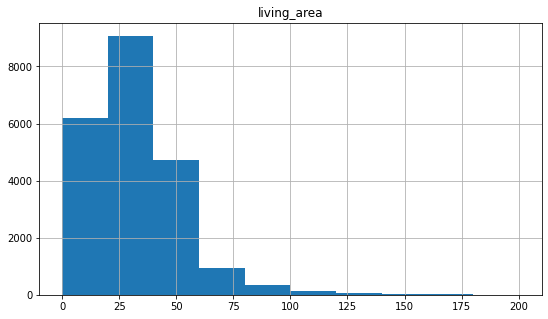

In [19]:
# анализ аномалий стобца
range_living_area = data.living_area.value_counts(bins=30).to_frame()
range_living_area = range_living_area.rename( columns={'living_area':'Количество_квартир'})
range_living_area = range_living_area.rename_axis('Диапозон_площадей')
print(data['living_area'].describe())
display(range_living_area)
# количество аномальных квартир 
print(data.loc[data['living_area'] > 175, 'living_area'].count())
print(data.loc[data['living_area'] < 10, 'living_area'].count())
# удаление 'аномальных квартир'
data = data.loc[(data['living_area'] <= 175) | (data['living_area'].isnull())]
data = data.loc[(data['living_area'] >= 10) | (data['living_area'].isnull())]
print(data['living_area'].describe())
data.hist('living_area', bins = 10, range = (0 , 200), figsize = (9, 5))
print(data.shape[0])

*В датасете только 90(0.004%) квартир имеют жилую площадь менее 10м2 и более 175м2 их решено удалить* 

count    21171.000000
mean        10.421874
std          5.435306
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        100.700000
Name: kitchen_area, dtype: float64


Диапозон_площадей
(7.927, 11.24]                 8691
(4.613, 7.927]                 6475
(11.24, 14.553]                3194
(14.553, 17.867]               1340
(17.867, 21.18]                 573
(21.18, 24.493]                 278
(24.493, 27.807]                151
(27.807, 31.12]                 140
(1.2000000000000002, 4.613]      75
(34.433, 37.747]                 67
(37.747, 41.06]                  51
(31.12, 34.433]                  49
(41.06, 44.373]                  25
(44.373, 47.687]                 20
(47.687, 51.0]                   16
(51.0, 54.313]                    6
(60.94, 64.253]                   5
(54.313, 57.627]                  4
(57.627, 60.94]                   4
(64.253, 67.567]                  2
(74.193, 77.507]                  2
(67.567, 70.88]                   1
(84.133, 87.447]                  1
(97.387, 100.7]                   1
(70.88, 74.193]                   0
(77.507, 80.82]                   0
(80.82, 84.133]                   0
(87.447, 9

29
29
count    21113.000000
mean        10.361939
std          5.076160
min          4.000000
25%          7.000000
50%          9.000000
75%         12.000000
max         50.000000
Name: kitchen_area, dtype: float64
23353


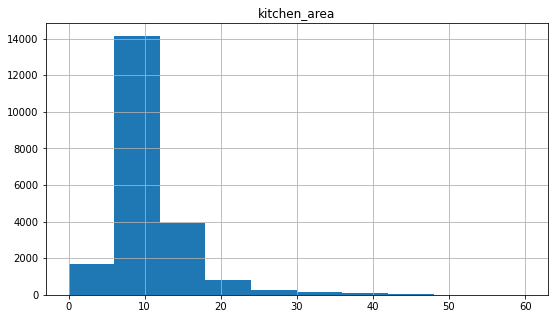

In [20]:
# анализ аномалий стобца
range_kitchen_area = data['kitchen_area'].value_counts(bins=30)
range_kitchen_area = range_kitchen_area.rename_axis('Диапозон_площадей')
print(data['kitchen_area'].describe())
display(range_kitchen_area)
# количество аномальных квартир 
print(data.loc[data['kitchen_area'] > 50, 'kitchen_area'].count())
print(data.loc[data['kitchen_area'] < 4, 'kitchen_area'].count())
# удаление 'аномальных квартир'
data = data.loc[(data['kitchen_area'] <= 50) | (data['kitchen_area'].isnull())]
data = data.loc[(data['kitchen_area'] >= 4) | (data['kitchen_area'].isnull())]
print(data['kitchen_area'].describe())
data.hist('kitchen_area', bins = 10, range = (0 , 60), figsize = (9, 5))
print(data.shape[0])

*В датасете только 41(0.002%) квартир имеют кухонную площадь менее 4м2 и более 45м2, их решено удалить* 

##### Обработка квартир расположенных на аномальных этажах

count    23353.000000
mean         5.898985
std          4.888464
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


,Количество_квартир
Количество этажей,
2.0,3310
3.0,3021
1.0,2889
4.0,2748
5.0,2577
6.0,1284
7.0,1192
8.0,1072
9.0,1045


39
count    23314.000000
mean         5.863773
std          4.815568
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         25.000000
Name: floor, dtype: float64
23314


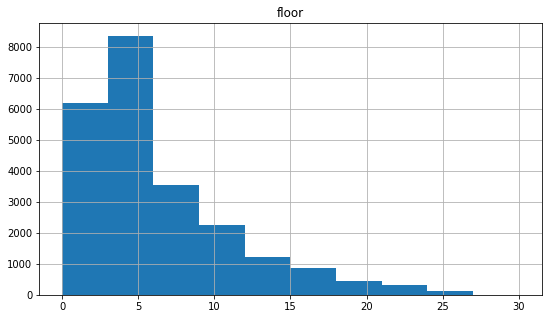

In [21]:
# анализ аномалий стобца
floor_count = data.floor.value_counts().to_frame()
floor_count = floor_count.rename( columns={'floor':'Количество_квартир'})
floor_count = floor_count.rename_axis('Количество этажей')
print(data['floor'].describe())
display(floor_count)
# количество аномальных квартир 
print(data.loc[data['floor'] > 25, 'floor'].count())
# удаление 'аномальных квартир'
data = data.loc[data['floor'] <= 25]
data['floor'] = data['floor'].astype('int')
print(data['floor'].describe())
data.hist('floor', bins = 10, range = (0 , 30), figsize = (9, 5))
print(data.shape[0])


*В датасете только 40(0.0017%) квартир расположены выше 25 этажа, их решено удалить* 

##### Обработка квартир расположенных в аномально высоких домах

count    23229.000000
mean        10.680098
std          6.557838
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


,Количество_квартир
Количество этажей,
5.0,5704
9.0,3737
16.0,1369
12.0,1358
10.0,1168
4.0,1159
25.0,1066
6.0,866
17.0,828


21
297
count    23208.000000
mean        10.656584
std          6.511072
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         28.000000
Name: floors_total, dtype: float64
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8991
floors_total                0
living_area              1840
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2188
balcony                     0
locality_name               0
airports_nearest         5488
city_centers_nearest     5468
parks_around3000            0
parks_nearest           15372
ponds_around3000            0
ponds_nearest           14391
days_exposition          3113
dtype: int64


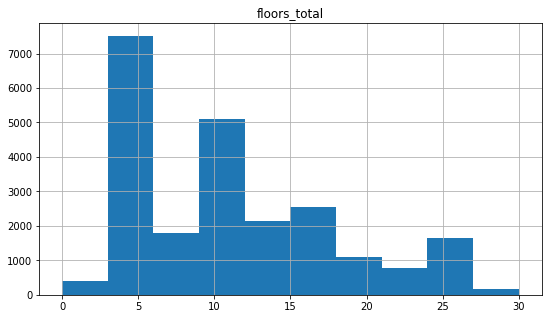

In [22]:
# анализ аномалий стобца
floor_total_count = data.floors_total.value_counts().to_frame()
floor_total_count = floor_total_count.rename( columns={'floors_total':'Количество_квартир'})
floor_total_count = floor_total_count.rename_axis('Количество этажей')
print(data['floors_total'].describe())
display(floor_total_count)
# подсчёт количества аномальных квартир 
print(data.loc[data['floors_total'] > 28, 'floors_total'].count())
print(data.loc[data['floors_total'] > 25, 'floors_total'].count())
# удаление 'аномальных квартир'
data = data.loc[data['floors_total'] <= 28]
print(data['floors_total'].describe())
data.hist('floors_total', bins = 10, range = (0 , 30), figsize = (9, 5))
print(data.isna().sum())

*Казалось бы можно на основе предыдущего вывода о этажах квартиры, удалить все дома до 25 этажа, но
тогда потеряются 309 квартир или (0.013%), что на мой взгляд достаточно много поэтому решено было удалить
 33(0.0013%) квартиры расположены в домах  выше 28 этажей* 

In [23]:
# Показатели о кол-ве объявлений в обработанном датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир
# обработанные данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)




,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,208.00","23,208.00","14,217.00","20,095.00","23,208.00","21,368.00","21,020.00","23,208.00","23,208.00"
min,0.00,12.00,2.00,1.00,"12,190.00",10.00,4.00,1.00,1.00
max,7.00,400.00,4.00,"1,299.00","65,000,000.00",175.00,50.00,25.00,28.00


In [24]:
# Количество удаленных значений
print(data.shape[0])
print('Удаленно', ((23699 - data.shape[0])/23699 ) * 100, '%')


23208
Удаленно 2.0718173762606016 %


*Вывод: Удаленно 2.07% всех данных, но они стали гораздо более однородными*  

### Посчет и добавление в таблицу новых столбцов

In [25]:
# Расчет цены квадратного метра и добавления этого столбца в таблицу
data['price_square_meter'] = (data['last_price'] / data['total_area']).astype('int')
# Добавление столбца с указанием дня недели продажи квартиры
data['week_day'] = pd.DatetimeIndex(data['first_day_exposition']).day_name()
# добавление столбца с указанием месяца продажи квартиры
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
# добавление столбца с указанием года продажи квартиры
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
# Создание функции расчета этажа квартиры
def func_type_floor(floor):#объявление функции 
    if floor['floor'] == 1: #проверка на первый этаж
        return 'первый'
    elif floor['floor'] == floor['floors_total']: #проверка на последний этаж (равенство с floors_total)
        return 'последний'
    else: #общий случай (ни первый, ни последний)
        return 'другой'
# создание столбца с указание типа этажа с помощью функции func_type_floor 
data['typefloor'] = data[['floor', 'floors_total']].apply(func_type_floor, axis=1) 
# создание столбца с указанием растояние до центра в км и округление до целых чисел
data['city_centers_nearest_km'] = (data['city_centers_nearest']/1000).round(0)
# .convert_types() перестал работать :(
# вывод обновленного датафрейма
print(data)
print(data.isna().sum())

       total_images  last_price  total_area first_day_exposition  rooms  \
0              20.0  13000000.0      108.00  2019-03-07 00:00:00      3   
1               7.0   3350000.0       40.40  2018-12-04 00:00:00      1   
2              10.0   5196000.0       56.00  2015-08-20 00:00:00      2   
3               0.0  64900000.0      159.00  2015-07-24 00:00:00      3   
4               2.0  10000000.0      100.00  2018-06-19 00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694           9.0   9700000.0      133.81  2017-03-21 00:00:00      3   
23695          14.0   3100000.0       59.00  2018-01-15 00:00:00      3   
23696          18.0   2500000.0       56.70  2018-02-11 00:00:00      2   
23697          13.0  11475000.0       76.75  2017-03-28 00:00:00      2   
23698           4.0   1350000.0       32.30  2017-07-21 00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0                2.70 

In [26]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23208 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_images             23208 non-null  float64
 1   last_price               23208 non-null  float64
 2   total_area               23208 non-null  float64
 3   first_day_exposition     23208 non-null  object 
 4   rooms                    23208 non-null  int64  
 5   ceiling_height           14217 non-null  float64
 6   floors_total             23208 non-null  float64
 7   living_area              21368 non-null  float64
 8   floor                    23208 non-null  int64  
 9   is_apartment             23208 non-null  object 
 10  studio                   23208 non-null  object 
 11  open_plan                23208 non-null  object 
 12  kitchen_area             21020 non-null  float64
 13  balcony                  23208 non-null  float64
 14  locality_name         

In [27]:
# check
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,week_day,month,year,typefloor,city_centers_nearest_km
0,20.0,13000000.0,108.00,2019-03-07 00:00:00,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370,Thursday,3,2019,другой,16.0
1,7.0,3350000.0,40.40,2018-12-04 00:00:00,1,NaN,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920,Tuesday,12,2018,первый,19.0
2,10.0,5196000.0,56.00,2015-08-20 00:00:00,2,NaN,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785,Thursday,8,2015,другой,14.0
3,0.0,64900000.0,159.00,2015-07-24 00:00:00,3,NaN,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176,Friday,7,2015,другой,7.0
4,2.0,10000000.0,100.00,2018-06-19 00:00:00,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000,Tuesday,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9.0,9700000.0,133.81,2017-03-21 00:00:00,3,3.70,5.0,73.3,3,False,...,796.0,3.0,381.0,NaN,72490,Tuesday,3,2017,другой,4.0
23695,14.0,3100000.0,59.00,2018-01-15 00:00:00,3,NaN,5.0,38.0,4,False,...,NaN,0.0,NaN,45.0,52542,Monday,1,2018,другой,NaN
23696,18.0,2500000.0,56.70,2018-02-11 00:00:00,2,NaN,3.0,29.7,1,False,...,NaN,0.0,NaN,NaN,44091,Sunday,2,2018,первый,NaN
23697,13.0,11475000.0,76.75,2017-03-28 00:00:00,2,3.00,17.0,NaN,12,False,...,173.0,3.0,196.0,602.0,149511,Tuesday,3,2017,другой,10.0


### Исследовательский анализ данных
####  Анализ графиков и краткие выводы

Text(0.5, 1.0, 'Распределение квартир по общей площади')

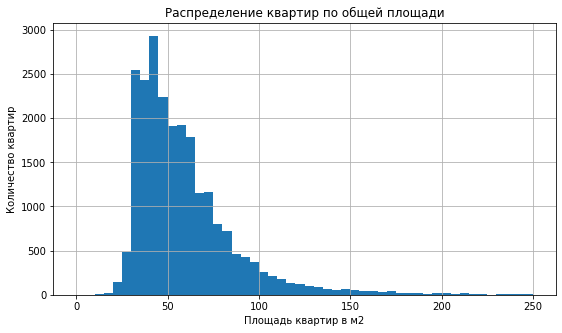

In [28]:
data.hist('total_area', grid = True, bins = 50, range = (0, 250), figsize = (9, 5))

plt.xlabel('Площадь квартир в м2')

plt.ylabel('Количество квартир')
  
plt.title('Распределение квартир по общей площади')

*На гистограмме, отражающей общую площадь, видны значительные выбросы в  минимальном количестве , в целом, распределение  нормальное*

Text(0.5, 1.0, 'Распределение квартир по жилой площади')

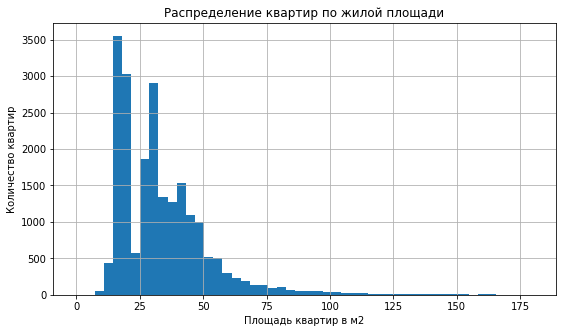

In [29]:
data.hist('living_area', grid = True, bins = 50, range = (0, 180), figsize = (9, 5))

plt.xlabel('Площадь квартир в м2')

plt.ylabel('Количество квартир')
  
plt.title('Распределение квартир по жилой площади')

*На гистограмме, отражающей общую жилую площадь, видны значительные выбросы в  минимальном количестве,  распределение далеко от нормального учитывая спад посередине и 2 пиковых значения*

Text(0.5, 1.0, 'Распределение квартир по кухонной площади')

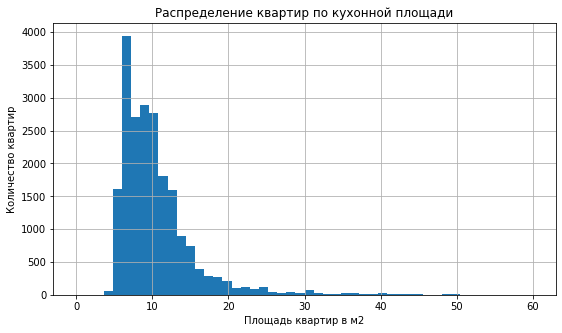

In [30]:
data.hist('kitchen_area', grid = True, bins = 50, range = (0, 60), figsize = (9, 5))

plt.xlabel('Площадь квартир в м2')

plt.ylabel('Количество квартир')
  
plt.title('Распределение квартир по кухонной площади')

*На гистограмме, отражающей общую площадь кухни, видны отдельные выбросы в минимальном количестве, в целом распределение близко к нормальному, видно преоблодание малогабаритных кухней*

count    2.320800e+04
mean     5.984752e+06
std      5.145629e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      6.500000e+07
Name: last_price, dtype: float64


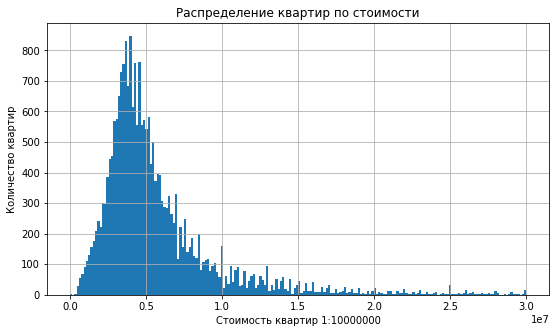

In [31]:
data.hist('last_price', grid = True, bins = 200, range = (0, 30000000), figsize = (9, 5))

plt.xlabel('Стоимость квартир 1:10000000')

plt.ylabel('Количество квартир')
  
plt.title('Распределение квартир по стоимости')

print(data['last_price'].describe())

*Гистограмме по стоимости жилья данные выглядят нормально, видно преобладание недвижимости в диапозоне от 3.4млн. до 6.8млн. рублей*

count    23208.000000
mean         2.047010
std          1.012221
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64


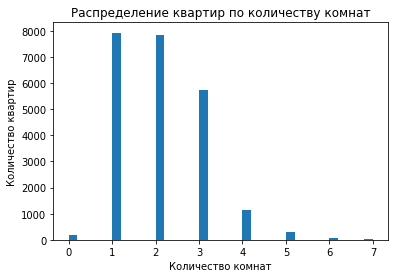

In [32]:
plt.hist(data['rooms'], bins = 35)

plt.xlabel('Количество комнат')

plt.ylabel('Количество квартир')
  
plt.title('Распределение квартир по количеству комнат')

print(data['rooms'].describe())

*Гистограмма "по количеству комнат" выглядит выглядит реалистичной, на рынке представлены в основном жилье с 1-3 комнатами*

Text(0.5, 1.0, 'Распределение квартир по этажам')

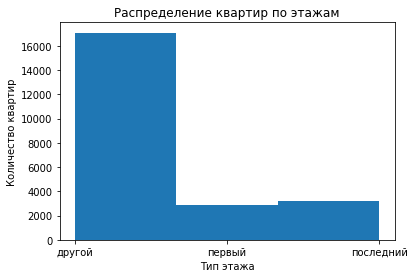

In [33]:

plt.hist(data['typefloor'], bins = 3)

plt.xlabel('Тип этажа')

plt.ylabel('Количество квартир')
  
plt.title('Распределение квартир по этажам')


*Видно преобладание этажей  с типом 'другой' это и логично в данных представлена застройка Санкт-Петербурга
видно четкое преобладание малоэтажной застройки(1-5 этажей) и небольшой процент одноэтажной недвижимости
единственная странность почему последних этажей больше чем первых что не совсем логично будь дом полностью жилой вероятно часть
первых этажей отданные под комерческую, или какую либо другую недвижимость и не является жилыми*

count    23208.000000
mean         5.842770
std          4.797396
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         25.000000
Name: floor, dtype: float64


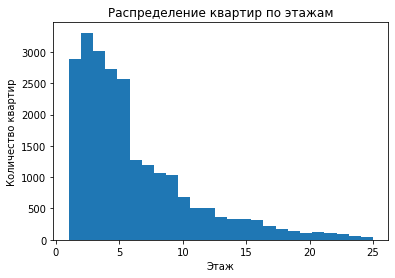

In [34]:
plt.hist(data['floor'], bins = 25)

plt.xlabel('Этаж')

plt.ylabel('Количество квартир')
  
plt.title('Распределение квартир по этажам')

print(data['floor'].describe())


*Распределение нормальное, к данным вопросов нет, люди чаще селятся на невысоком этаже здесь сказывается преобладание малоэтажной застройки*

count    23208.000000
mean        10.656584
std          6.511072
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         28.000000
Name: floors_total, dtype: float64


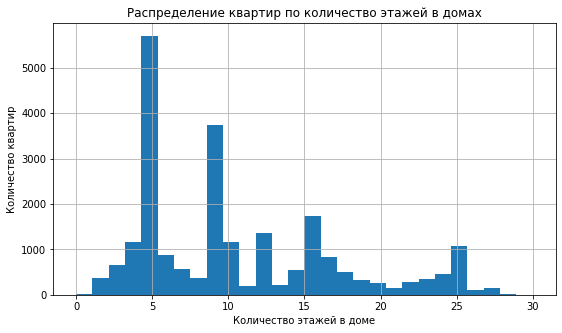

In [35]:
data.hist('floors_total', grid = True, bins = 28, range = (0, 30), figsize = (9, 5))

plt.xlabel('Количество этажей в доме')

plt.ylabel('Количество квартир')
  
plt.title('Распределение квартир по количество этажей в домах')

print(data['floors_total'].describe())

*Распределение несиметрично видно что большая часть данных находится в значении "5" наглядное приобладание застройки "хрущевских времен" в современном жилом фонде*

Text(0.5, 1.0, 'Распределение квартир по удаленности от центра')

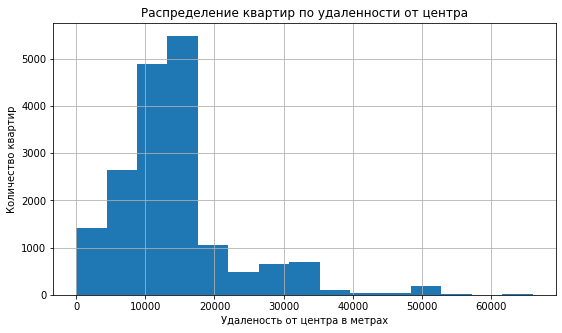

In [36]:
data.hist('city_centers_nearest', grid = True, bins = 15, range = (0, 66000), figsize = (9, 5))

plt.xlabel('Удаленость от центра в метрах')

plt.ylabel('Количество квартир')
  
plt.title('Распределение квартир по удаленности от центра')

*Распределение нормальное наглядно видно что большинство жилого фонда сосредоточено в 17 км от центра Санкт-Петербурга,при приближении к пригородам плотность жилой застройки заметно падает и окончательно редеет за городом(около 35км примерный диаметр города)*

Text(0.5, 1.0, 'Распределение квартир по удаленности от аэропортов')

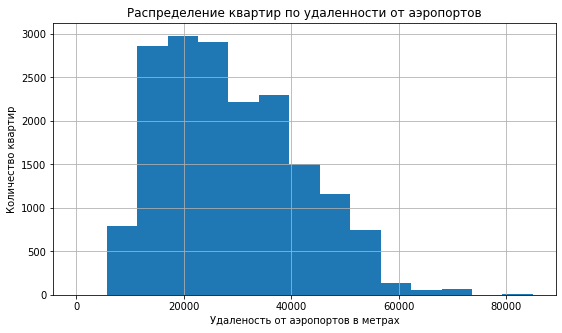

In [37]:
data.hist('airports_nearest', grid = True, bins = 15, range = (0, 85000), figsize = (9, 5))

plt.xlabel('Удаленость от аэропортов в метрах')

plt.ylabel('Количество квартир')
  
plt.title('Распределение квартир по удаленности от аэропортов')


*Распределение напоминает нормальное, видно большинсво недвижимости находится в радиусе 15-40км от аэропорта,
посколько из придыдущего графика мы выявили что большинство жилого фонда находится в за чертой города,
рискну предположить что речь в основном идет о аэропорте "Пулково" находяшийся в 15км от центра*

Text(0.5, 1.0, 'Распределение квартир по удаленности от парковых зон')

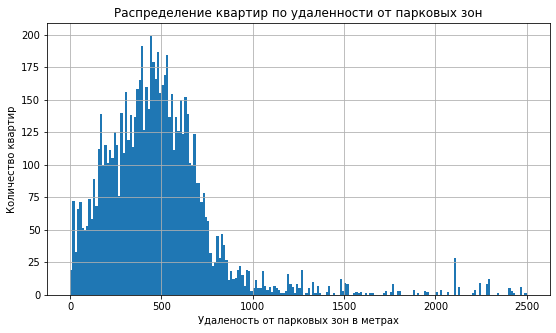

In [38]:
data.hist('parks_nearest', grid = True, bins = 200, range = (0, 2500), figsize = (9, 5))

plt.xlabel('Удаленость от парковых зон в метрах')

plt.ylabel('Количество квартир')
  
plt.title('Распределение квартир по удаленности от парковых зон')


*Распределение не симетрично, видно ,большинство парков рядом, около жилой застройке в радиусе 700м*

<function matplotlib.pyplot.show(close=None, block=None)>

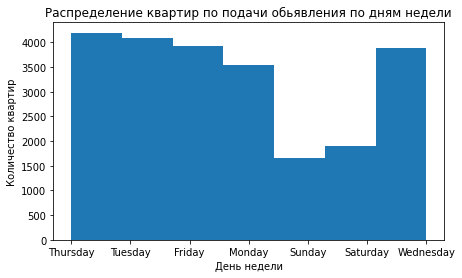

In [39]:
plt.figure(figsize=(7,4))
plt.hist(data['week_day'], bins=7)
plt.xlabel('День недели')

plt.ylabel('Количество квартир')
  
plt.title('Распределение квартир по подачи обьявления по дням недели')
plt.show

*Видно небольшое преобладание размещение обьявлений в четверг, и резкий спад размещения в выходные дни*

<function matplotlib.pyplot.show(close=None, block=None)>

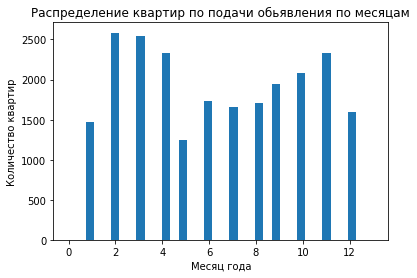

In [40]:
plt.hist(data['month'], bins = 36, range = (0, 13))

plt.xlabel('Месяц года')

plt.ylabel('Количество квартир')
  
plt.title('Распределение квартир по подачи обьявления по месяцам')
plt.show

*Объявления публикуются чаще весной есть уверенный спад в начале лета их меньше все размещают мае, наибольшая активность
проявляется в ноябре, возможно риелторы хотят закрыть годовой отчет, либо  частные продавцы в предверии нового года стремятся 
обновить недвижимость.*


#### Анализ скорости продажи квартир

count    20095.000000
mean       176.911271
std        210.499633
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1299.000000
Name: days_exposition, dtype: float64
Среднее Арифметическое 177.0
Медиана 94.0


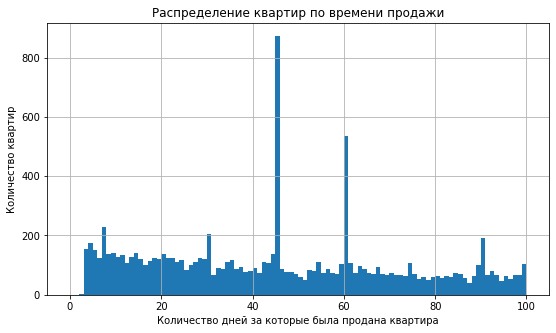

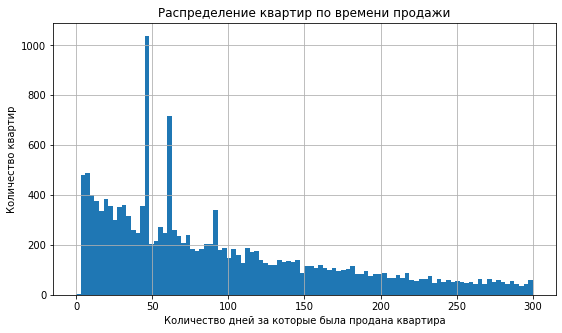

In [41]:
data.hist('days_exposition', bins = 100, range = (0, 100), figsize = (9, 5))

plt.xlabel('Количество дней за которые была продана квартира')

plt.ylabel('Количество квартир')
  
plt.title('Распределение квартир по времени продажи')
plt.show

data.hist('days_exposition', bins = 100, range = (0, 300), figsize = (9, 5))

plt.xlabel('Количество дней за которые была продана квартира')

plt.ylabel('Количество квартир')
  
plt.title('Распределение квартир по времени продажи')
plt.show
print(data['days_exposition'].describe())
print('Среднее', 'Арифметическое', data['days_exposition'].mean().round(0))
print('Медиана', data['days_exposition'].median())

*График был бы похож на нормальное распределение если бы не аномально  большое количество снятых обьявлений за 45, 60 и 90 день, судя по кратности дней можно предположить что на ресурсе где обьявления выкладываются есть определенный срок размещения  размещения, или по крайней мере, что определенно задействован внешний фактор, если это не учитывать то обычно быстрые продажи занимают до 45 дней согласно Q1, долгой продажа считается на 232 день размещения, в среднем квартиры продается за 177дней,медианное время продажи 94 дня. * 

#### Изучение факторов влияния на общую (полную) стоимость объекта

##### Корреляция цены и общей площади

                    mean      median
total_area                          
200.30      6.217192e+07  62171920.0
274.65      5.991412e+07  59914124.0
172.40      5.953489e+07  59534892.0
300.00      5.925000e+07  59250000.0
127.50      4.346667e+07  59000000.0
...                  ...         ...
54.33       1.300000e+06   1300000.0
29.62       1.300000e+06   1300000.0
28.60       2.034000e+06   1060000.0
19.50       9.457500e+05    945750.0
28.66       6.900000e+05    690000.0

[2039 rows x 2 columns]


0.7691794790131901

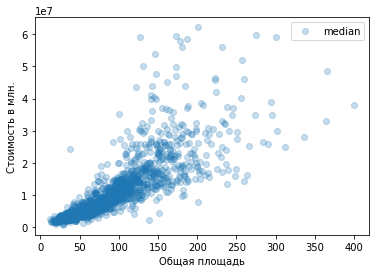

In [42]:
# создание сводной таблицы для расчета корреляции
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'median'])
pivot_table_total_area.columns = ['mean', 'median']

# построение графика
pivot_table_total_area.plot(y='median', style = 'o', alpha=0.25,)

plt.xlabel('Общая площадь')

plt.ylabel('Стоимость в млн.')

plt.show

# вывод таблицы и расчёт корреляции
pivot_table_total_area = pivot_table_total_area.sort_values('median', ascending = False)
print(pivot_table_total_area)
data['total_area'].corr(data['last_price'])


*Вывод: Корреляция достаточно высокая*

##### Корреляция цены и жилой площади

                   mean      median
living_area                        
74.30        63900000.0  63900000.0
159.50       59914124.0  59914124.0
91.24        59534892.0  59534892.0
99.21        57906000.0  57906000.0
150.40       56000000.0  56000000.0
...                 ...         ...
16.31         1700000.0   1700000.0
18.11         1695000.0   1695000.0
12.81         1690715.0   1690715.0
10.94         1550000.0   1550000.0
20.97          990000.0    990000.0

[1660 rows x 2 columns]


0.6709944798980655

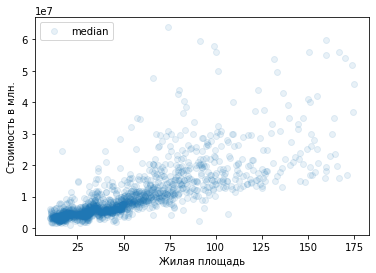

In [43]:
# создание сводной таблицы для расчета корреляции
pivot_table_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'median'])
pivot_table_living_area.columns = ['mean', 'median']

# построение графика
pivot_table_living_area.plot(y='median', style = 'o',alpha=0.1)

plt.xlabel('Жилая площадь')

plt.ylabel('Стоимость в млн.')

plt.show

# вывод таблицы и расчёт корреляции
pivot_table_living_area = pivot_table_living_area.sort_values('median', ascending = False)
print(pivot_table_living_area)
data['living_area'].corr(data['last_price'])


*Вывод: Присутсвует средняя корреляция *

##### Корреляция цены и кухонной площади

                   mean      median
living_area                        
74.30        63900000.0  63900000.0
159.50       59914124.0  59914124.0
91.24        59534892.0  59534892.0
99.21        57906000.0  57906000.0
150.40       56000000.0  56000000.0
...                 ...         ...
16.31         1700000.0   1700000.0
18.11         1695000.0   1695000.0
12.81         1690715.0   1690715.0
10.94         1550000.0   1550000.0
20.97          990000.0    990000.0

[1660 rows x 2 columns]


0.5820607916127164

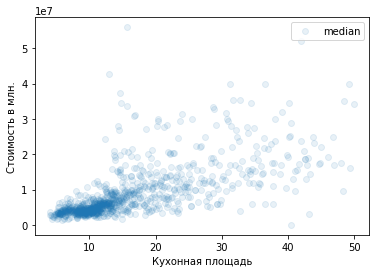

In [44]:
# создание сводной таблицы для расчета корреляции
pivot_table_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'median'])
pivot_table_kitchen_area.columns = ['mean', 'median']

# построение графика
pivot_table_kitchen_area.plot(y='median', style = 'o',alpha=0.1)
plt.xlabel('Кухонная площадь')

plt.ylabel('Стоимость в млн.')

plt.show

# вывод таблицы и расчёт корреляции
pivot_table_kitchen_area = pivot_table_living_area.sort_values('median', ascending = False)

print(pivot_table_living_area)
data['kitchen_area'].corr(data['last_price'])


*Вывод: Средняя корреляция* 

##### Корреляция цены, цены м2 и количества комнат

###### Корреляция  общей цены и количества комнат

               mean  count      median
rooms                                 
0      2.965677e+06    187   2700000.0
1      3.822888e+06   7925   3600000.0
2      5.506641e+06   7825   4750000.0
3      7.779954e+06   5721   6150000.0
4      1.162189e+07   1138   8925000.0
5      1.623929e+07    293  13000000.0
6      1.994964e+07     81  16900000.0
7      2.223221e+07     38  18000000.0


0.4797371378201744

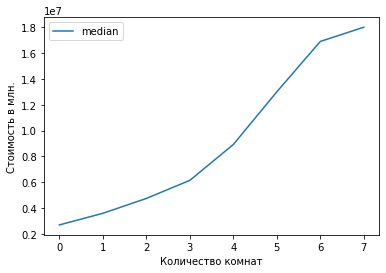

In [45]:
# создание сводной таблицы для расчета корреляции
pivot_table_room_number = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_room_number.columns = ['mean', 'count', 'median']

# построение графика
pivot_table_room_number.query('count > 20').plot(y = 'median')
plt.xlabel('Количество комнат')

plt.ylabel('Стоимость в млн.')

plt.show

# вывод таблицы и расчёт корреляции
pivot_table_room_number.sort_values('median', ascending = False)
print(pivot_table_room_number) 
data['rooms'].corr(data['last_price'])

*Вывод: Корреляция небольшая общая стоимость постепенно растет до 3 комнат, 
после с последующим увеличением наступает стремительный рост*

###### Корреляция цены квадратного метра и количества комнат

                mean  count    median
rooms                                
0      107578.133690    187  105042.0
1      100575.262082   7925  100000.0
2       94886.457764   7825   92619.0
3       95223.934452   5721   88750.0
4      103531.999121   1138   91945.5
5      105909.460751    293   91904.0
6      108225.617284     81   95000.0
7      112575.342105     38  105830.5


-0.014639804361814668

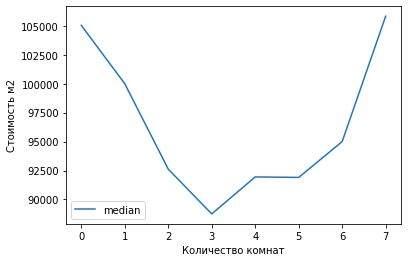

In [46]:
# создание сводной таблицы для расчета корреляции
pivot_table_room_number = data.pivot_table(index = 'rooms', values = 'price_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_room_number.columns = ['mean', 'count', 'median']

# построение графика
pivot_table_room_number.query('count > 20').plot(y = 'median')
plt.xlabel('Количество комнат')

plt.ylabel('Стоимость м2')

plt.show

# вывод таблицы и расчёт корреляции
pivot_table_room_number.sort_values('median', ascending = False)
print(pivot_table_room_number) 
data['rooms'].corr(data['price_square_meter'])

*Вывод: Cтоимость м2 прогрессивно снижается к 3м комнатам, затем растет*

##### Зависимость цены и типа этажа

                   mean  count     median
typefloor                                
другой     6.241859e+06  17085  4800000.0
первый     4.657643e+06   2886  3900000.0
последний  5.810936e+06   3237  4300000.0


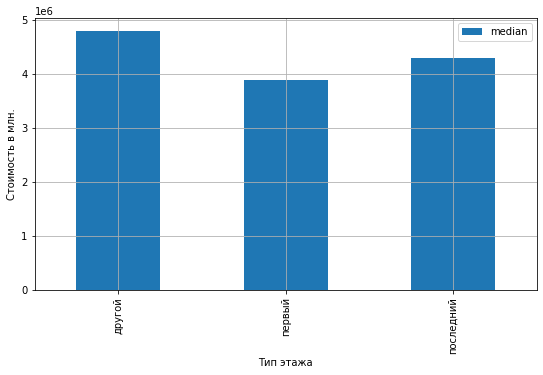

In [47]:
# создание сводной таблицы для расчета зависимости
pivot_table_floor_type = data.pivot_table(index = 'typefloor', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_type.columns = ['mean', 'count', 'median']

# построение графика
pivot_table_floor_type.plot(y = 'median', kind = 'bar', grid = True, figsize = (9, 5))

plt.xlabel('Тип этажа')

plt.ylabel('Стоимость в млн.')

plt.show

# вывод таблицы
print(pivot_table_floor_type)

*Вывод: Cтоимость м2 как видно на графике, на первом этаже ниже всего, затем градция снижения идетё к последнему этажу, больше всего квартиры стоят на этажах между первых и последним*

##### Зависимость цены и дня недели размещения

                   mean  count     median
week_day                                 
Friday     5.887885e+06   3929  4550000.0
Monday     6.075722e+06   3545  4630000.0
Saturday   5.810689e+06   1896  4500000.0
Sunday     5.706288e+06   1660  4500000.0
Thursday   6.172948e+06   4194  4600000.0
Tuesday    5.934994e+06   4095  4700000.0
Wednesday  6.052850e+06   3889  4700000.0


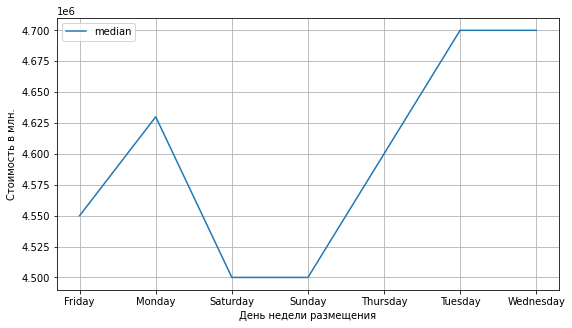

In [48]:
# создание сводной таблицы для расчета зависимости
pivot_table_posting_date = data.pivot_table(index = 'week_day', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_posting_date.columns = ['mean', 'count', 'median']

# построение графика
pivot_table_posting_date.plot(y = 'median', kind = 'line', grid = True, figsize = (9, 5))

plt.xlabel('День недели размещения')

plt.ylabel('Стоимость в млн.')

plt.show

# вывод таблицы 
print(pivot_table_posting_date)

*Вывод: Во вторник размещались наиболее дорогие квартиры, однако, к субботе показатель падает до минимума, но здесь нужно также учесть обнаруженный ранее факт о том, что люди реже размещают объявления на выходных*

##### Зависимость цены и месяца размещения

               mean  count     median
month                                
1      6.068644e+06   1471  4600000.0
2      6.044433e+06   2584  4650000.0
3      5.906926e+06   2541  4610000.0
4      5.929029e+06   2327  4755000.0
5      6.001523e+06   1244  4500000.0
6      5.818435e+06   1728  4400000.0
7      6.005650e+06   1651  4600000.0
8      6.009211e+06   1711  4550000.0
9      6.047617e+06   1941  4690000.0
10     5.850741e+06   2081  4550000.0
11     6.109669e+06   2330  4650000.0
12     6.050903e+06   1599  4650000.0


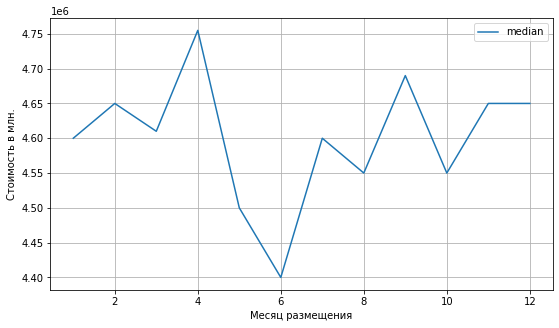

In [49]:
# создание сводной таблицы для расчета зависимости
pivot_table_posting_month = data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_posting_month.columns = ['mean', 'count', 'median']

# построение графика
pivot_table_posting_month.plot(y = 'median', kind = 'line', grid = True, figsize = (9, 5))

plt.xlabel('Месяц размещения')

plt.ylabel('Стоимость в млн.')

plt.show

# вывод таблицы
print(pivot_table_posting_month)

*Вывод:В апреле размещались самые дорогие варианты недвижимости, в мае и июне - самые доступные.*

##### Корреляция цены и года размещения

              mean  count     median
year                                
2014  1.042379e+07    117  7265000.0
2015  7.127767e+06   1120  5215000.0
2016  6.157974e+06   2728  4500000.0
2017  5.889364e+06   8022  4500000.0
2018  5.683802e+06   8387  4550000.0
2019  6.343667e+06   2834  5030000.0


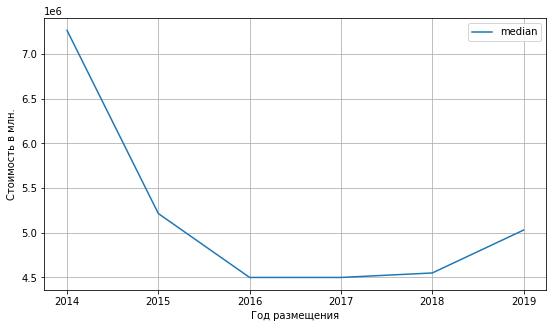

In [50]:
# создание сводной таблицы для расчета зависимости
pivot_table_posting_year = data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_posting_year.columns = ['mean', 'count', 'median']

# построение графика
pivot_table_posting_year.plot(y = 'median', kind = 'line', grid = True, figsize = (9, 5))

plt.xlabel('Год размещения')

plt.ylabel('Стоимость в млн.')

plt.show

# вывод таблицы
print(pivot_table_posting_year)

*Вывод: Общая стоимость, начиная с 2014г, и дошла до минимальной отметки в 2016, после чего пошла вверх*

#### Цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

,count,mean
locality_name,,
Санкт-Петербург,15322,112470.50
Пушкин,359,102836.07
деревня Кудрово,299,92473.09
поселок Парголово,311,89873.38
поселок Мурино,536,85584.48
поселок Шушары,438,78576.55
Колпино,337,75332.87
Гатчина,306,68757.23
Всеволожск,396,68621.10


<function matplotlib.pyplot.show(close=None, block=None)>

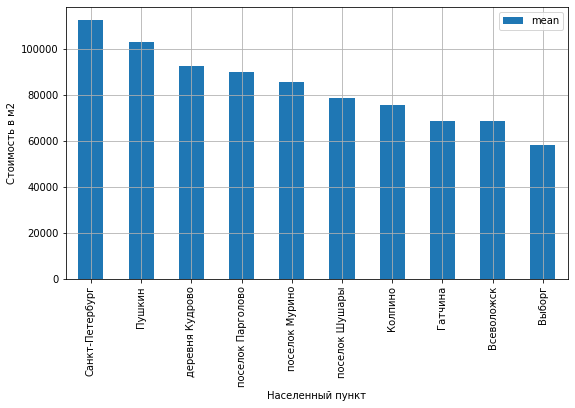

In [51]:
# создание таблицы для расчёта
average_price_per_m2 = data.pivot_table(index = 'locality_name', values = 'price_square_meter', aggfunc=['count', 'mean'])
average_price_per_m2.columns = ['count' , 'mean']
average_price_per_m2['mean'] = round(average_price_per_m2['mean'], 2)

top_by_count = average_price_per_m2.sort_values('count', ascending = False).head(10)

top_10 = top_by_count.sort_values('mean', ascending = False)
top_by_count['mean'] = top_by_count['mean'].round(2)
display(top_by_count.sort_values('mean', ascending = False))
top_10.plot(y = 'mean', kind = 'bar', grid = True, figsize = (9, 5))

plt.xlabel('Населенный пункт')

plt.ylabel('Стоимость в м2')

plt.show

*Вывод: Cредняя цена 1м2 среди топ-10 населенных пунктов по кол-ву объявлений = 84007руб./м2  
самая дорогая недвижимость в Санкт-Петербурге, самая дешевая - в Выборге*

#### Вычисление средней цены за каждый км близости к центру Санкт-Петербурга


,count,mean
city_centers_nearest_km,,
0.0,20,217258.15
1.0,171,146999.39
2.0,282,139945.59
3.0,333,118246.98
4.0,659,127448.13
5.0,868,136358.72
6.0,585,142333.29
7.0,403,148141.12
8.0,582,123788.42


<function matplotlib.pyplot.show(close=None, block=None)>

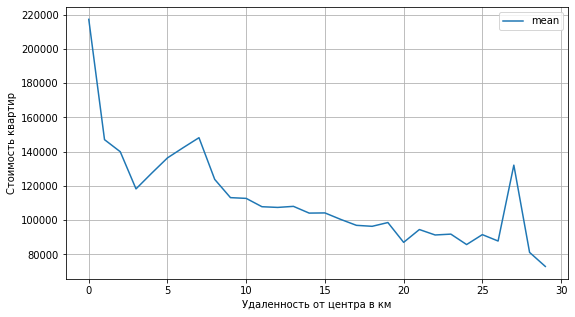

In [52]:
# создание сводной таблицы для расчётов
price_center_piter = data.query('locality_name == "Санкт-Петербург"')
center_price_distance = price_center_piter.pivot_table(index = 'city_centers_nearest_km', values = 'price_square_meter', aggfunc=['count', 'mean'])
center_price_distance.columns = center_price_distance.columns.droplevel(1)
center_price_distance['mean'] = center_price_distance['mean'].round(2)
display(center_price_distance)

# построение графика
center_price_distance.plot(y = 'mean', kind = 'line', grid = True, figsize = (9, 5))

plt.xlabel('Удаленность от центра в км')

plt.ylabel('Стоимость квартир')

plt.show


*Вывод: от 0 до 3 км от центра происходит значительное падение цены недвижости примерно в 2 раза, затем начиная с 3км до 7 км цена возрастает и после падает, затем цена возрастает на  27 км с последующим падением эти два возрастания я предполагаю связаны с наличием в этих местах районов с высоким уровнем жизни

### Общий вывод

На основе выводов полученных методом иследовательского анализа можно сделать общий вывод о том, что самые дорогие квартиры расположены в центре Санк-Петербурга и в примыкающих к нему населенных пунктах, с небольшим отрывом так же высокая цена в городе Выборг расположеного почти на границе Ленинградской области, на выходе из  центра города  происходит  падение цены недвижости примерно в 2 раза, на промежутке с 3-7 км и около  27 км цена возрастает что возможно связано с наличием в этих местах районов города с высоким уровнем жизни и развитой инфраструктуры.
    Если судить времени года начиная с марта и до начала мая цены на недвижимость растут, в мае значительно падают, и рост возобновляется только в начале лета и длиться до августа, то есть лучше время для продажи недвижимости это апрель, август, лучше время для покупки май.
    Что касательно дней недели, во вторник и среду люди размещают наиболее дорогие варианты, наиболее дешевые в субботу и воскресенье но на выходных делают это значительно реже.
    Что касательно градации цены по этажам люди стремятся жить между первым и последним этажом включительно, именно поэтому самые дешевые квартиры можно искать на первых этажах, чуть дешевле на последних.
    По количеству комнат при увеличении с 1-ой комнаты до 3-ёх идет падение цена за м2  самые дешевые квартиры по м2 трехкомнатные квартиры, затем начиная с 4-ёх комнат идет устойчивый рост цены
    Существует опредленная зависимость цены квартиры от жилой и кухонной площади, наиболее ярко выражена зависимость цены от общей площади. 
    Квартиры в среднем продавались оБыстрыми продажами квартир являются обьявлении размещенные до 45 дней, долгими срок которых превосходит 232 дня, много продаж приходится на 45,60,90 дней возможно это связано с работой сервиса по продажам квартир.
    Чаще всего люди публикуют обьявление в начале декабря, в январе публикаций почти не замечанно, так же рост публикаций весной и летом связано с изменением цены за м2.
   Чаще всего люди размещают обьявление в четверг, реже всего на выходных
   В большинстве случаев рядом жилом фондом расположены парковые зоны в радиусе 450м, касательно удаленности от аэропортов большинство квартир расположено на растоянии 15-40км от ближайщего аэропорта.
   Большинство недвижимости расположено в радиусе 17км что соответсвует примерно радиусу города, большинство квартир расположено  в диапозоне от второго до предпоследнего этажа, последние этажей больше чем первых, вероятно как правило на первых этажах размещается комерчерская, или другая не жилая недвижимость, большинство жилого фонда представлено 5 этажными домами, квартиры обычно одно или трехкомнатные, большинство квартир находится в ценовом диапозоне от 3.4 до 6.8 млн. рублей, квартиры в основном малогабаритные по общей, жилой и площади кухни.